## Air Passengers Forecasting Notebook

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error

In [33]:
data = pd.read_csv('AirPassengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(7)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148


In [22]:
data.isnull().mean()

Passengers    0.0
dtype: float64

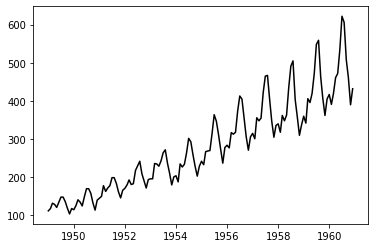

In [23]:
plt.plot(data, color='black')
plt.show()

In [57]:
scaler = sklearn.preprocessing.MinMaxScaler()
data['Passengers'] = scaler.fit_transform(data['Passengers'].values.reshape(-1,1))
data.head()

,Passengers
Month,
1949-01-01,0.015444
1949-02-01,0.027027
1949-03-01,0.054054
1949-04-01,0.048263
1949-05-01,0.032819


In [58]:
def slide_wind(data, wind_size):
    x = []
    y = []
    for i in range(wind_size, len(data)):
        x.append(data.iloc[i-wind_size : i, 0])
        y.append(data.iloc[i, 0])
    return x,y

x, y = slide_wind(data, 5)

In [59]:
x = np.array(x)
y = np.array(y)
y = y.reshape((len(x),1))
x.shape

(139, 5)

### Perbandingan MLP from scratch dengan MLP SKlearn dan LinearReggresion

In [60]:
model_data = np.hstack((x,y))
model_data

array([[0.01544402, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984556],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
        0.08494208],
       [0.05405405, 0.04826255, 0.03281853, 0.05984556, 0.08494208,
        0.08494208],
       [0.04826255, 0.03281853, 0.05984556, 0.08494208, 0.08494208,
        0.06177606],
       [0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
        0.02895753],
       [0.05984556, 0.08494208, 0.08494208, 0.06177606, 0.02895753,
        0.        ],
       [0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
        0.02702703],
       [0.08494208, 0.06177606, 0.02895753, 0.        , 0.02702703,
        0.02123552],
       [0.06177606, 0.02895753, 0.        , 0.02702703, 0.02123552,
        0.04247104],
       [0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104,
        0.07142857],
       [0.        , 0.02702703, 0.02123552, 0.04247104, 0.07142857,
        0.05984556],
       [0.02702703, 0

In [62]:
split = int(len(model_data)*0.8)
train_model = model_data[:split]
test_model = model_data[split:]

In [81]:
class NeuralNetwork:
    #step 1 : Initialization Artificial Neural Netwok Parameter
    def __init__(self, max_iter, alpha, hidden_layer, n_feature):
        self.max_iter = max_iter
        self.alpha = alpha
        self.hidden_layer = hidden_layer
        self.n_feature = n_feature

        #Initialization weight and bias
        self.weights = np.random.rand(hidden_layer,n_feature) *2-1
        self.bias1 = np.random.rand(hidden_layer) *2-1
        self.vectors = np.random.rand(1,hidden_layer) *2-1
        self.bias2 = np.random.rand(1) *2-1

    #Display Artificial Neural Netwok Parameter Configuration
    def display_config(self):
        print("Mas Iteration :",self.max_iter)
        print("Alpha value :", self.alpha)
        print("Amount of cell in hidden layer :",self.hidden_layer)

        #Check weight and bias shapes
        # Training weight dimension in input layer 
        print("Training weight dimension in input layer :",self.weights.shape)
        print("Training bias dimension in input layer:",self.bias1.shape)
        print("Training weight dimension in output layer :",self.vectors.shape)
        print("Training bias dimension in output layer :",self.bias2.shape)
    
    #Save Neural Network training weight and bias in csv file format. 
    def save_config(self):
        #weights
        #Save training weight on input layer in csv file format.
        self.weights = np.ravel(self.weights)
        self.weights = self.weights.tolist()
        self.weights = pd.DataFrame(list(zip(self.weights)),columns =['Weights'])
        self.weights .to_csv("t_weights.csv",index = False)

        #bias_1
        ##Save training bias on input layer in csv file format.
        self.bias1 = np.ravel(self.bias1)
        self.bias1 = self.bias1.tolist()
        self.bias1 = pd.DataFrame(list(zip(self.bias1)),columns =['Bias 1'])
        self.bias1.to_csv("t_bias1.csv",index = False)

        #vectors
        #Save training weight on hidden layer in csv file format.
        self.vectors = np.ravel(self.vectors)
        self.vectors = self.vectors.tolist()
        self.vectors = pd.DataFrame(list(zip(self.vectors)),columns =['Vectors'])
        self.vectors.to_csv("t_vectors.csv",index = False)

        #bias2
        #Save training bias on hidden layer in csv file format.
        self.bias2 = np.ravel(self.bias2)
        self.bias2 = self.bias2.tolist()
        self.bias2 = pd.DataFrame(list(zip(self.bias2)),columns =['Bias 2'])
        self.bias2.to_csv("t_bias2.csv",index = False)

        print("Bobot Pelatihan Telah disimpan")
        
    #Artificial neural netwok parameter training process 
    def fit(self, input):
        n = 0
        RMSE = np.zeros(self.max_iter + 1)
        ytrain_data = []
        while n <= self.max_iter:
            n+=1
            for i_data in range(0, len(input)):
                ytrain = input[i_data,self.n_feature]
                xtrain = input[i_data,0:self.n_feature]
                
                ytrain_data.append(ytrain)
                zj = np.zeros(self.hidden_layer)
                for i in range(0,self.hidden_layer):
                    net = np.sum(xtrain * self.weights[i]) + self.bias1[i]
                    zj[i] = 1/(1 + math.exp(-net))
                
                yj =np.zeros(1)
                for i in range(0,1):
                    net = np.sum(zj * self.vectors[i])+ self.bias2[i]
                    yj[i] = 1/(1 + math.exp(-net))
            
                for i in range(0,1):
                    error = yj-ytrain
                    
                SSE = sum(error**2)

                error_grd = error * yj[i] * (1 - yj[i])

                delta_gradv = np.zeros(shape=(1, self.hidden_layer))
                for i in range(0,1):
                    delta_gradv[i,:] = self.alpha * error_grd[i] * zj
                delta_bias2 = np.zeros(1)
                for i in range(0,1):
                    delta_bias2[i] = self.alpha * error_grd[i] * 1

                v_hidden = np.zeros(self.hidden_layer)
                for i in range(0,self.hidden_layer):
                    v_hidden_net = sum(error_grd * self.vectors[:,i])
                    v_hidden[i] = v_hidden_net * zj[i] * (1 - zj[i])
                
                delta_gradw = np.zeros(shape=(self.hidden_layer,self.n_feature))
                for i in range(0,1):
                    delta_gradw = self.alpha * v_hidden[i] * xtrain[i]
                delta_bias1 = np.zeros(self.hidden_layer)
                for i in range(0,self.hidden_layer):
                    delta_bias1 = self.alpha * v_hidden[i] * 1
                
                self.weights = self.weights + delta_gradw
                self.bias1 = self.bias1 + delta_bias1
                self.vectors = self.vectors + delta_gradv
                self.bias2 = self.bias2 + delta_bias2
            
            RMSE[n] = np.sqrt(SSE/len(input))
            target_range = np.max(ytrain_data) - np.min(ytrain_data)
            
            if n == self.max_iter:
                print("\n Training Is Over")
                break
        print('\n The RMSE For Epoch',n,'=', RMSE[n])
        percentage_accuracy = (1.0 - (RMSE[n] / target_range)) * 100
        print('\n Training Accuracy Rate :',percentage_accuracy,"%")
    #Artificial neural netwok parameter predict process 
    def predict(self, input):
        actual_data = []
        predict_data = []

        for i_data in range(0, len(input)):
            ytest = input[i_data,self.n_feature]
            xtest = input[i_data,0:self.n_feature]
            
            zj = np.zeros(self.hidden_layer)
            for i in range(0,self.hidden_layer):
                znet = np.sum(xtest * self.weights[i]) + self.bias1[i]
                zj[i] = 1/(1 + math.exp(-znet))
            
            yj =np.zeros(1)
            for i in range(0,1):
                ynet = np.sum(zj * self.vectors[i])+ self.bias2[i]
                yj[i] = 1/(1 + math.exp(-ynet))
            actual_data.append(ytest)
            predict_data.append(yj[i])

            for i in range(0,1):
                    error = ytest-yj
            SSE = sum(error**2)
            RMSE = np.sqrt(SSE/len(input))
            target_range = np.max(actual_data) - np.min(actual_data)
        print("Nilai RMSE Hasil Pengujian : ", RMSE)
        percentage_accuracy = (1.0 - (RMSE / target_range)) * 100
        print('\n Testing Accuracy Rate :',percentage_accuracy,"%")

In [82]:
fs_nn = NeuralNetwork(100, 0.01, 10, 5)
fs_nn.display_config()
fs_nn.fit(train_model)

Mas Iteration : 100
Alpha value : 0.01
Amount of cell in hidden layer : 10
Training weight dimension in input layer : (10, 5)
Training bias dimension in input layer: (10,)
Training weight dimension in output layer : (1, 10)
Training bias dimension in output layer : (1,)

 Training Is Over

 The RMSE For Epoch 100 = 0.02128431871290118

 Training Accuracy Rate : 97.25055434082724 %


In [83]:
fs_nn.predict(test_model)

Nilai RMSE Hasil Pengujian :  0.0690407428618576

 Testing Accuracy Rate : 88.53746640947364 %


In [123]:
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_test.shape

(28,)

In [132]:
#100, 0.01, 10, 5
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(
    activation='logistic',
    solver='lbfgs',
    alpha=1e-2,
    early_stopping=False,
    hidden_layer_sizes=(10),
    random_state=1,
    batch_size='auto',
    max_iter=100,
    learning_rate_init=0.01,
    power_t=0.5,
    tol=1e-4,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08
)
mlp_model.fit(x_train,y_train)

MLPRegressor(activation='logistic', alpha=0.01, hidden_layer_sizes=10,
             learning_rate_init=0.01, max_iter=100, random_state=1,
             solver='lbfgs')

In [141]:
precision = mlp_model.predict(x_test)

In [134]:
def loss_accuracy(act, pred):
    loss = act - pred
    SSE = sum(loss**2)
    RMSE = np.sqrt(SSE/len(act))
    target = np.max(act) - np.min(act)
    accuracy = (1.0 - (RMSE / target)) * 100
    print('\n Training Accuracy Rate :',accuracy,"%")
    print('\n RMSE Loss Value :',RMSE)

In [135]:
loss_accuracy(y_test,precision)


 Training Accuracy Rate : 84.76613958760237 %

 RMSE Loss Value : 0.09175607043760738
